{1: (0, 0), 2: (1, 1), 3: (2, 0), 4: (1, -1), 5: (3, 5), 6: (3, 1)}


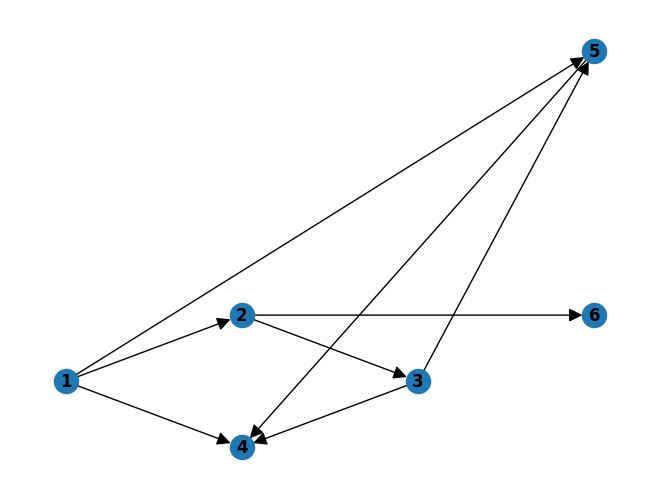

In [31]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed acyclic graph (DAG)
acyclic_graph = nx.DiGraph()
acyclic_graph.add_node(1, pos=(0, 0))
acyclic_graph.add_node(2, pos=(1, 1))
acyclic_graph.add_node(3, pos=(2, 0))
acyclic_graph.add_node(4, pos=(1, -1))
acyclic_graph.add_node(5, pos=(3, 5))
acyclic_graph.add_node(6, pos=(3, 1))

#acyclic_graph.add_edges_from([(1, 2), (1,4), (2, 3), (2, 4), (3, 5), (3, 6), (4, 7), (4, 8), (5,9), (5,8), (8,6)])
acyclic_graph.add_edges_from([(1,2), (2,3), (3,4), (1,4), (3,5), (5,4), (1,5), (2,6)])
node_positions = nx.get_node_attributes(acyclic_graph, 'pos')
print(node_positions) 
acyclic_graph_dict = {node: list(acyclic_graph.successors(node)) for node in acyclic_graph.nodes}
# Visualize the acyclic graph (optional)
nx.draw(acyclic_graph, node_positions , with_labels=True, font_weight='bold', arrowsize=20)  
plt.show()

In [32]:
def topological_sort(graph):
    # Helper function for recursive depth-first search
    def dfs(node):
        visited.add(node)
        for neighbor in graph[node]:
            if neighbor not in visited:
                dfs(neighbor)
        topological_order.insert(0, node)

    visited = set()
    topological_order = []

    # Perform depth-first search for each unvisited node
    for node in graph:
        if node not in visited:
            dfs(node)

    return topological_order

def layer_assignment(acyclic_graph):
#The layer of a node is determined by considering the maximum layer of its incoming neighbors and incrementing it.
    topological_order = topological_sort(acyclic_graph)
    layers = {node: 0 for node in acyclic_graph}  # Initialize all nodes to Layer 0
    
    for node in topological_order:
        in_neighbors = [neighbor for neighbor, successors in acyclic_graph.items() if node in successors]
        layer = max([layers[neighbor] for neighbor in in_neighbors], default=-1) + 1
        layers[node] = layer

    return layers

def y_coordinate_assignment(layers):
#assigns y-coordinates to nodes based on their layers. It sorts the nodes by layer and assigns y-coordinates in increasing order.
    sorted_nodes = sorted(layers.keys(), key=lambda node: layers[node])
    y_coordinates = {node: layer for layer, node in enumerate(sorted_nodes)}
    return y_coordinates


In [33]:
import pydot

def height_optimization(graph):
    layers = []  # List to store layers
    while graph.nodes():
        sources = [node for node in graph.nodes() if not list(graph.predecessors(node))]
        layers.append(sources)
        graph.remove_nodes_from(sources)
    return layers

def y_coordinate_assignment_with_height_optimization(graph):
    height_optimization_layers = height_optimization(graph)
    y_coordinates = {}
    #print(height_optimization_layers)
    # Assign y-coordinates based on the height optimization layers
    for layer_index, layer in enumerate(height_optimization_layers):
        for node in layer:
            y_coordinates[node] = layer_index

    return y_coordinates, height_optimization_layers




In [34]:
# # Perform layer assignment
# layers = layer_assignment(acyclic_graph_dict)

# # # Perform y-coordinate assignment based on layers
# # #y_coordinates = y_coordinate_assignment(layers)

# # #Perform y-coordinate assignment based on height optimization
# y_coordinates_with_height_optimization = y_coordinate_assignment_with_height_optimization(acyclic_graph)
# for node, y_coordinate in sorted(y_coordinates_with_height_optimization.items()):
#     node_positions[node] = (node_positions[node][0],y_coordinate)
#     print(node_positions[node][0],y_coordinate)
    
# print(node_positions)



# nx.draw(acyclic_graph,node_positions ,with_labels=True, font_weight='bold', arrowsize=20)  
# plt.show()

# #Print the layer assignment and y-coordinate assignment
# # for node, layer in layers.items():
# #     print(f"Node {node}: Layer {layer}, y-coordinate = {y_coordinates[node]}")

# for node, y_coordinate in sorted(y_coordinates_with_height_optimization.items()):
#    print(f"Node {node}: y-coordinate = {y_coordinate}")

In [35]:

import networkx as nx
import matplotlib.pyplot as plt


def calculate_crossings(graph):
    crossings = 0
    for u, v in graph.edges():
        for w, x in graph.edges():
            if u != w and u != x and v != w and v != x:
                if (u < w < v < x) or (w < u < x < v):
                    crossings += 1
    return crossings // 2



{0: [1], 1: [2], 2: [3, 6], 3: [5], 4: [4]}
{1: (0, 0), 2: (1, 1), 3: (2, 2), 4: (1, 4), 5: (3, 3), 6: (3, 2)}


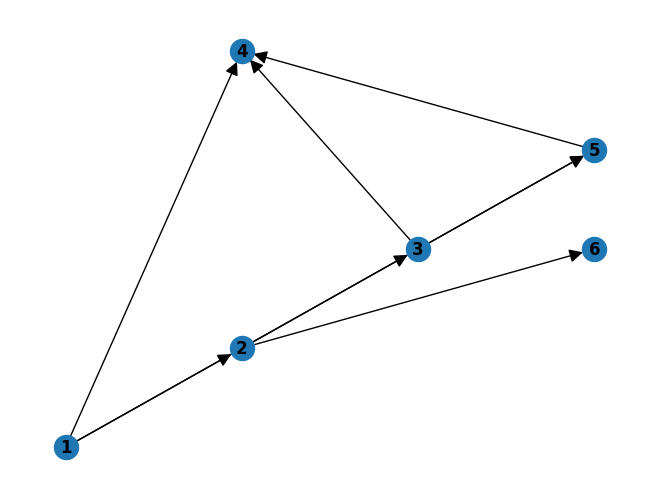

In [36]:
#Example layer assignment

y_coordinates_with_height_optimization, layers = y_coordinate_assignment_with_height_optimization(acyclic_graph.copy())

for node, y_coordinate in sorted(y_coordinates_with_height_optimization.items()):
    node_positions[node] = (node_positions[node][0],y_coordinate)

layers_new = {}
for i,item in enumerate(layers):
    layers_new[i] = item

def get_edges(graph, node):
    edge_list = []
    for edge in graph.edges():
        source, dest = edge
        if source == node:
            edge_list.append(dest)
    return edge_list



print(layers_new)

layer_crossing_edges = {}
for key in layers_new:
    for value in layers_new[key]:
        edges = get_edges(acyclic_graph, value)
        for dest in edges:
            if dest not in layers_new[key+1]:
                layer_crossing_edges[key] = (value, dest) 
            

# for key in layer_crossing_edges:
#     source, dest = layer_crossing_edges[key]

#     acyclic_graph.add_node(source, pos=(node_positions[source][0], int(key)+1))
#     node_positions[source] = (node_positions[source][0], int(key)+1)
#     print(source)
#     #rint(f"removed {source} - {dest}")

print(node_positions)

nx.draw(acyclic_graph,node_positions ,with_labels=True, font_weight='bold', arrowsize=20)
plt.show()


In [37]:
# #TRASH

# prev_crossings = calculate_crossings(acyclic_graph)
# print(layers)
# print(y_coordinates_with_height_optimization)
# #print(prev_crossings)
# for _ in range(10): 
#     #median_positions = median_heuristic(acyclic_graph, node_positions)
#     barycenter_positions = barycenter_heuristic(acyclic_graph, node_positions)
#     crossings = calculate_crossings(acyclic_graph)
#     # if crossings >= prev_crossings:
#     #     break  
#     prev_crossings = crossings
#     print(crossings)
#     #print(barycenter_positions)
    

#     test = dict(sorted(barycenter_positions.items(), reverse=True))
#     print(test)    
#     nx.draw(acyclic_graph,test ,with_labels=True, font_weight='bold', arrowsize=20, font_color="red")
#     plt.show()

